In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
data = gpd.read_file('maps/FR_communes-avec-outre-mer.geojson')

In [4]:
data.head()

code            nom                                           geometry
0  97101         Abymes  MULTIPOLYGON (((-61.54884 16.25312, -61.54687 ...
1  97102  Anse-Bertrand  POLYGON ((-61.43453 16.43901, -61.43465 16.441...
2  97103   Baie-Mahault  POLYGON ((-61.64843 16.21296, -61.64692 16.214...
3  97104        Baillif  POLYGON ((-61.75104 16.03449, -61.74941 16.034...
4  97105    Basse-Terre  POLYGON ((-61.72299 15.98556, -61.72578 15.987...

In [5]:
data[data['nom'] == 'Saül']

code   nom                                           geometry
45  97352  Saül  POLYGON ((-53.10089 3.22992, -53.11308 3.23168...

In [6]:
comm_arr = pd.read_csv('maps/french_guyana_communes_arrond.csv')
comm_arr.head()

commune           arrondissement
0           Awala-Yalimapo  Saint-Laurent-du-Maroni
1                     Mana  Saint-Laurent-du-Maroni
2  Saint-Laurent-du-Maroni  Saint-Laurent-du-Maroni
3                   Apatou  Saint-Laurent-du-Maroni
4              Grand-Santi  Saint-Laurent-du-Maroni

In [7]:
guyana_geo = data.loc[data['code'].str.contains('973')]
guyana_geo.shape

(22, 3)

In [ ]:
#guyana_geo.loc[52, 'nom'] = 'Papaïchton'

In [8]:
guyana_geo

code                      nom  \
32  97301                   Régina   
33  97302                  Cayenne   
34  97304                   Kourou   
35  97305                 Macouria   
36  97306                     Mana   
37  97307                  Matoury   
38  97308            Saint-Georges   
39  97309          Remire-Montjoly   
40  97310                    Roura   
41  97311  Saint-Laurent-du-Maroni   
42  97312                Sinnamary   
43  97313   Montsinéry-Tonnegrande   
44  97314                  Ouanary   
45  97352                     Saül   
46  97353              Maripasoula   
47  97356                   Camopi   
48  97357              Grand-Santi   
49  97358               Saint-Élie   
50  97360                   Apatou   
51  97361           Awala-Yalimapo   
52  97362               Papaichton   
87  97303                 Iracoubo   

                                             geometry  
32  POLYGON ((-53.10089 3.22992, -53.10394 3.23681...  
33  MULTIPOLYGON (((-52.31517 4.89120, -52.31797 4...  
34  POLYGON ((-52.60460 4.91677, -52.60931 4.90254...  
35  POLYGON ((-52.37479 4.90315, -52.38387 4.90077...  
36  POLYGON ((-53.78035 4.25870, -53.78621 4.26241...  
37  POLYGON ((-52.31517 4.89120, -52.31442 4.88441...  
38  POLYGON ((-52.50108 3.49466, -52.49880 3.50026...  
39  POLYGON ((-52.31517 4.89120, -52.31807 4.89529...  
40  POLYGON ((-52.37242 4.76572, -52.36814 4.76515...  
41  POLYGON ((-53.79400 4.27318, -53.79954 4.27558...  
42  POLYGON ((-53.21251 5.01256, -53.20832 5.02392...  
43  POLYGON ((-52.37242 4.76572, -52.37428 4.76040...  
44  POLYGON ((-51.96299 4.00369, -51.96357 4.01016...  
45  POLYGON ((-53.10089 3.22992, -53.11308 3.23168...  
46  POLYGON ((-53.73906 3.97699, -53.73107 3.98555...  
47  POLYGON ((-53.31720 2.34012, -53.31239 2.34295...  
48  POLYGON ((-53.78035 4.25870, -53.78558 4.24974...  
49  POLYGON ((-53.15488 3.90453, -53.16418 3.91286...  
50  POLYGON ((-54.26291 5.27642, -54.26287 5.27267...  
51  POLYGON ((-54.01513 5.64388, -54.01488 5.65248...  
52  POLYGON ((-53.73906 3.97699, -53.74422 3.97215...  
87  POLYGON ((-53.36644 4.91700, -53.37307 4.92092...

In [9]:
guyana = {}
for i, row in comm_arr.iterrows():
    guyana[row.commune] = row.arrondissement

In [10]:
guyana_geo['country'] = guyana_geo['nom'].map(guyana)

/home/varaya/.local/share/virtualenvs/geo-hyperstorylines-kyioqhKQ/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [11]:
guyana_geo

code                      nom  \
32  97301                   Régina   
33  97302                  Cayenne   
34  97304                   Kourou   
35  97305                 Macouria   
36  97306                     Mana   
37  97307                  Matoury   
38  97308            Saint-Georges   
39  97309          Remire-Montjoly   
40  97310                    Roura   
41  97311  Saint-Laurent-du-Maroni   
42  97312                Sinnamary   
43  97313   Montsinéry-Tonnegrande   
44  97314                  Ouanary   
45  97352                     Saül   
46  97353              Maripasoula   
47  97356                   Camopi   
48  97357              Grand-Santi   
49  97358               Saint-Élie   
50  97360                   Apatou   
51  97361           Awala-Yalimapo   
52  97362               Papaichton   
87  97303                 Iracoubo   

                                             geometry                  country  
32  POLYGON ((-53.10089 3.22992, -53.10394 3.23681...                  Cayenne  
33  MULTIPOLYGON (((-52.31517 4.89120, -52.31797 4...                  Cayenne  
34  POLYGON ((-52.60460 4.91677, -52.60931 4.90254...                  Cayenne  
35  POLYGON ((-52.37479 4.90315, -52.38387 4.90077...                  Cayenne  
36  POLYGON ((-53.78035 4.25870, -53.78621 4.26241...  Saint-Laurent-du-Maroni  
37  POLYGON ((-52.31517 4.89120, -52.31442 4.88441...                  Cayenne  
38  POLYGON ((-52.50108 3.49466, -52.49880 3.50026...                  Cayenne  
39  POLYGON ((-52.31517 4.89120, -52.31807 4.89529...                  Cayenne  
40  POLYGON ((-52.37242 4.76572, -52.36814 4.76515...                  Cayenne  
41  POLYGON ((-53.79400 4.27318, -53.79954 4.27558...  Saint-Laurent-du-Maroni  
42  POLYGON ((-53.21251 5.01256, -53.20832 5.02392...                  Cayenne  
43  POLYGON ((-52.37242 4.76572, -52.37428 4.76040...                  Cayenne  
44  POLYGON ((-51.96299 4.00369, -51.96357 4.01016...                  Cayenne  
45  POLYGON ((-53.10089 3.22992, -53.11308 3.23168...  Saint-Laurent-du-Maroni  
46  POLYGON ((-53.73906 3.97699, -53.73107 3.98555...  Saint-Laurent-du-Maroni  
47  POLYGON ((-53.31720 2.34012, -53.31239 2.34295...                  Cayenne  
48  POLYGON ((-53.78035 4.25870, -53.78558 4.24974...  Saint-Laurent-du-Maroni  
49  POLYGON ((-53.15488 3.90453, -53.16418 3.91286...                  Cayenne  
50  POLYGON ((-54.26291 5.27642, -54.26287 5.27267...  Saint-Laurent-du-Maroni  
51  POLYGON ((-54.01513 5.64388, -54.01488 5.65248...  Saint-Laurent-du-Maroni  
52  POLYGON ((-53.73906 3.97699, -53.74422 3.97215...  Saint-Laurent-du-Maroni  
87  POLYGON ((-53.36644 4.91700, -53.37307 4.92092...                  Cayenne

In [12]:
colors = {}
colors['Cayenne'] = "#d95f02"
colors['Saint-Laurent-du-Maroni'] = "#1b9e77"
guyana_geo['color'] = guyana_geo['country'].map(colors)

/home/varaya/.local/share/virtualenvs/geo-hyperstorylines-kyioqhKQ/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

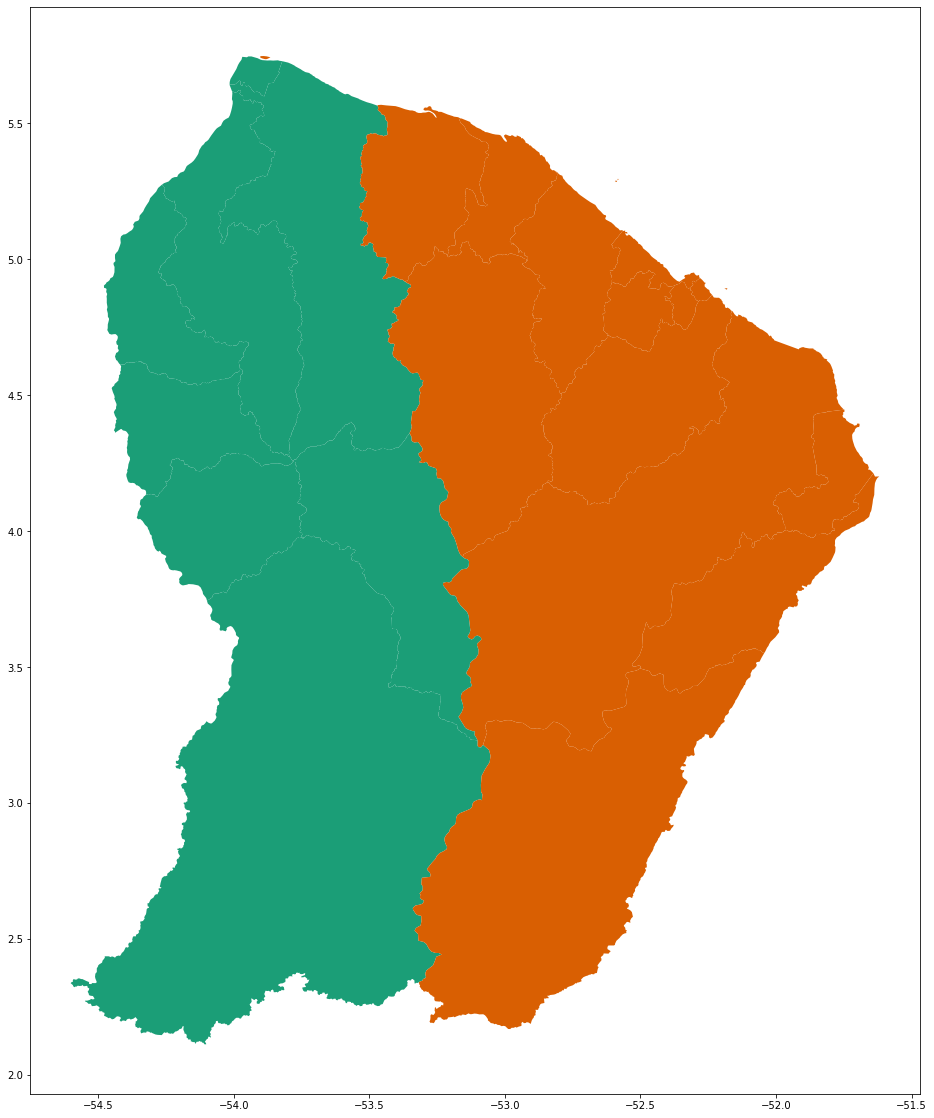

In [13]:
guyana_geo.plot(figsize = (20, 20), color= guyana_geo['color'])

In [14]:
guyana_geo.rename(columns = {'nom':'name'}, inplace = True)
guyana_geo.drop(['code'], axis=1, inplace=True)
guyana_geo.head()

/home/varaya/.local/share/virtualenvs/geo-hyperstorylines-kyioqhKQ/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/varaya/.local/share/virtualenvs/geo-hyperstorylines-kyioqhKQ/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


name                                           geometry  \
32    Régina  POLYGON ((-53.10089 3.22992, -53.10394 3.23681...   
33   Cayenne  MULTIPOLYGON (((-52.31517 4.89120, -52.31797 4...   
34    Kourou  POLYGON ((-52.60460 4.91677, -52.60931 4.90254...   
35  Macouria  POLYGON ((-52.37479 4.90315, -52.38387 4.90077...   
36      Mana  POLYGON ((-53.78035 4.25870, -53.78621 4.26241...   

                    country    color  
32                  Cayenne  #d95f02  
33                  Cayenne  #d95f02  
34                  Cayenne  #d95f02  
35                  Cayenne  #d95f02  
36  Saint-Laurent-du-Maroni  #1b9e77

# CREATE COUNTRIES

In [15]:
#guyana_geo['geometry'] = guyana_geo['geometry'].buffer(0.0028)
countries = guyana_geo.dissolve(by='country', as_index=False)
#countries = pd.DataFrame(countries.to_records())
countries['name'] = countries['country']
countries.reset_index(inplace=True)
countries.drop(['index'], axis=1, inplace=True)
countries.head()

country                                           geometry  \
0                  Cayenne  MULTIPOLYGON (((-53.31720 2.34012, -53.31239 2...   
1  Saint-Laurent-du-Maroni  POLYGON ((-53.10089 3.22992, -53.10139 3.21163...   

                      name    color  
0                  Cayenne  #d95f02  
1  Saint-Laurent-du-Maroni  #1b9e77

<AxesSubplot:>

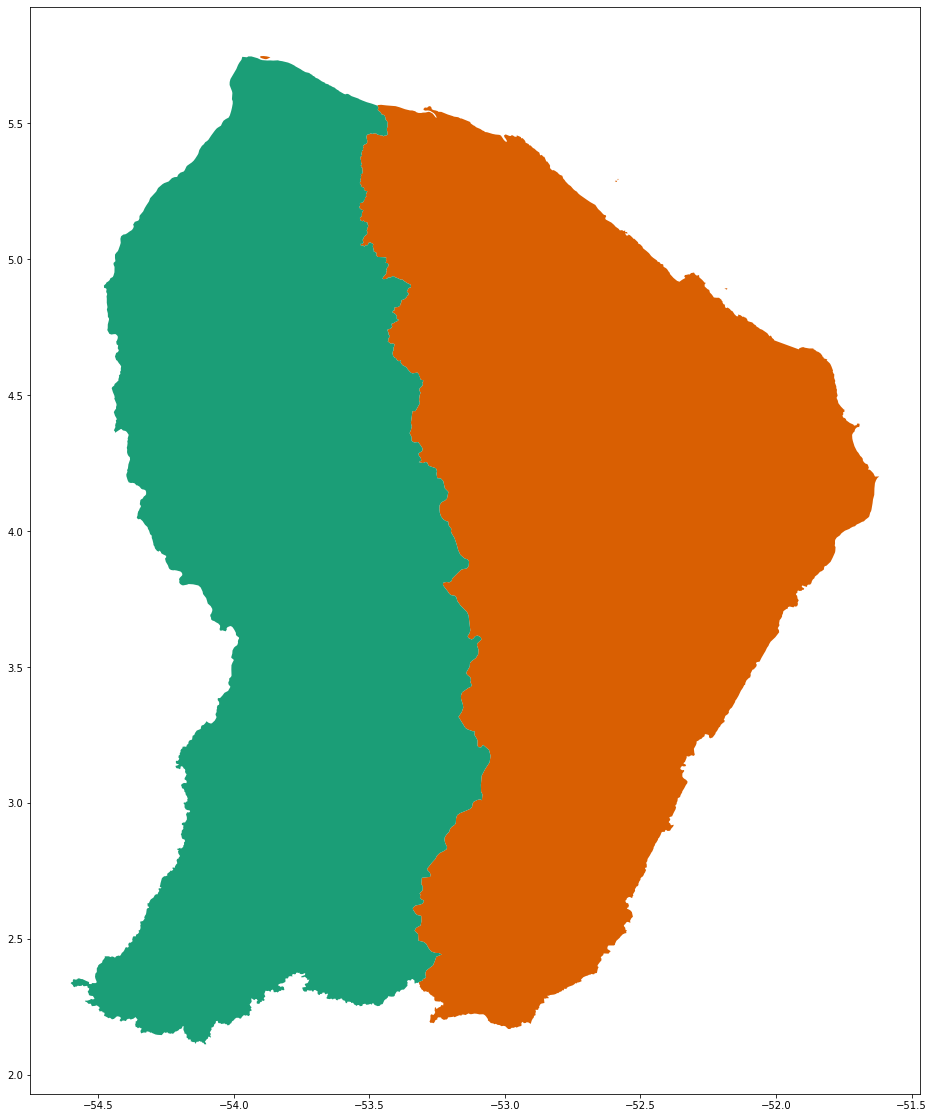

In [16]:
countries.plot(figsize=(20,20), color=countries['color'])

In [17]:
guyana_geo['hierarchical_level'] = 'child'
countries['hierarchical_level'] = 'parent'

/home/varaya/.local/share/virtualenvs/geo-hyperstorylines-kyioqhKQ/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

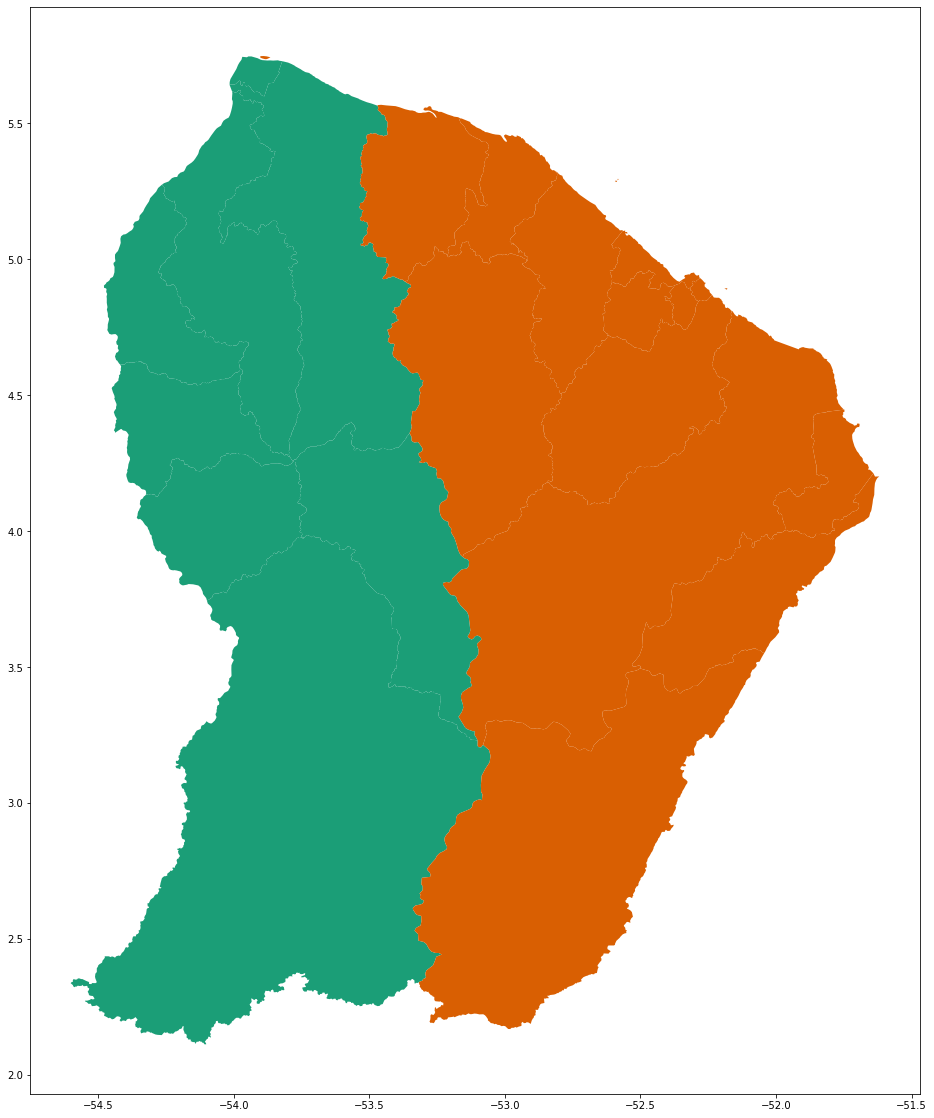

In [18]:
guyana_geo.plot(figsize = (20, 20), color=guyana_geo['color'])

In [19]:
guyana_final = guyana_geo.append(countries, ignore_index=True)
guyana_final.to_file("./maps/guyana_provinces.json", driver="GeoJSON")